<a href="https://colab.research.google.com/github/alouiyaz78/yazid.aloui/blob/main/Fonctions_D_Activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>Les fonctions d'activation dans les Réseaux de Neurones Artificiels (ANN)
</bold>

Prof : My Abdelouahed Sabri
abdelouahed.sabri@gmail.com

Vidéo Youtube: https://youtu.be/uDbNhGJQoTU
</center></h1>

Table des matières
<ul>
1.	Introduction</br>
2. Rôle et objectifs des fonctions d'activation</br>
3. Différentes fonctions d’activation</br>
4. Vanishing Gradient Problem </br>
5. Conclusion	</br>
</ul>
---

<H1> Introduction </h1>

Une fonction d'activation dans un réseau de neurones artificiels est une fonction mathématique appliquée au signal de sortie d'un neurone. Son rôle est de faire en sorte à ce que le neurone soit activé ou non.

La fonction d’activation est essentielle pour apprendre et comprendre des données complexes, car elle introduit des propriétés non-linéaires au réseau.

**Historique** :
*   1957 : Fonction de seuil (ou fonction marche (step))
*   1980-1990 : Fonctions sigmoïde et tanh
*   2010 : ReLU (Rectified Linear Unit) et ses Variantes
*   1980 : Softmax
*   2017 : Swish


Le tableau ci-dessous récapitule les fonctions d’activations les plus utilisées avec pour chaque fonction, la couche ou elle est le plus souvent utilisée ainsi que les avantages et les inconvénients.




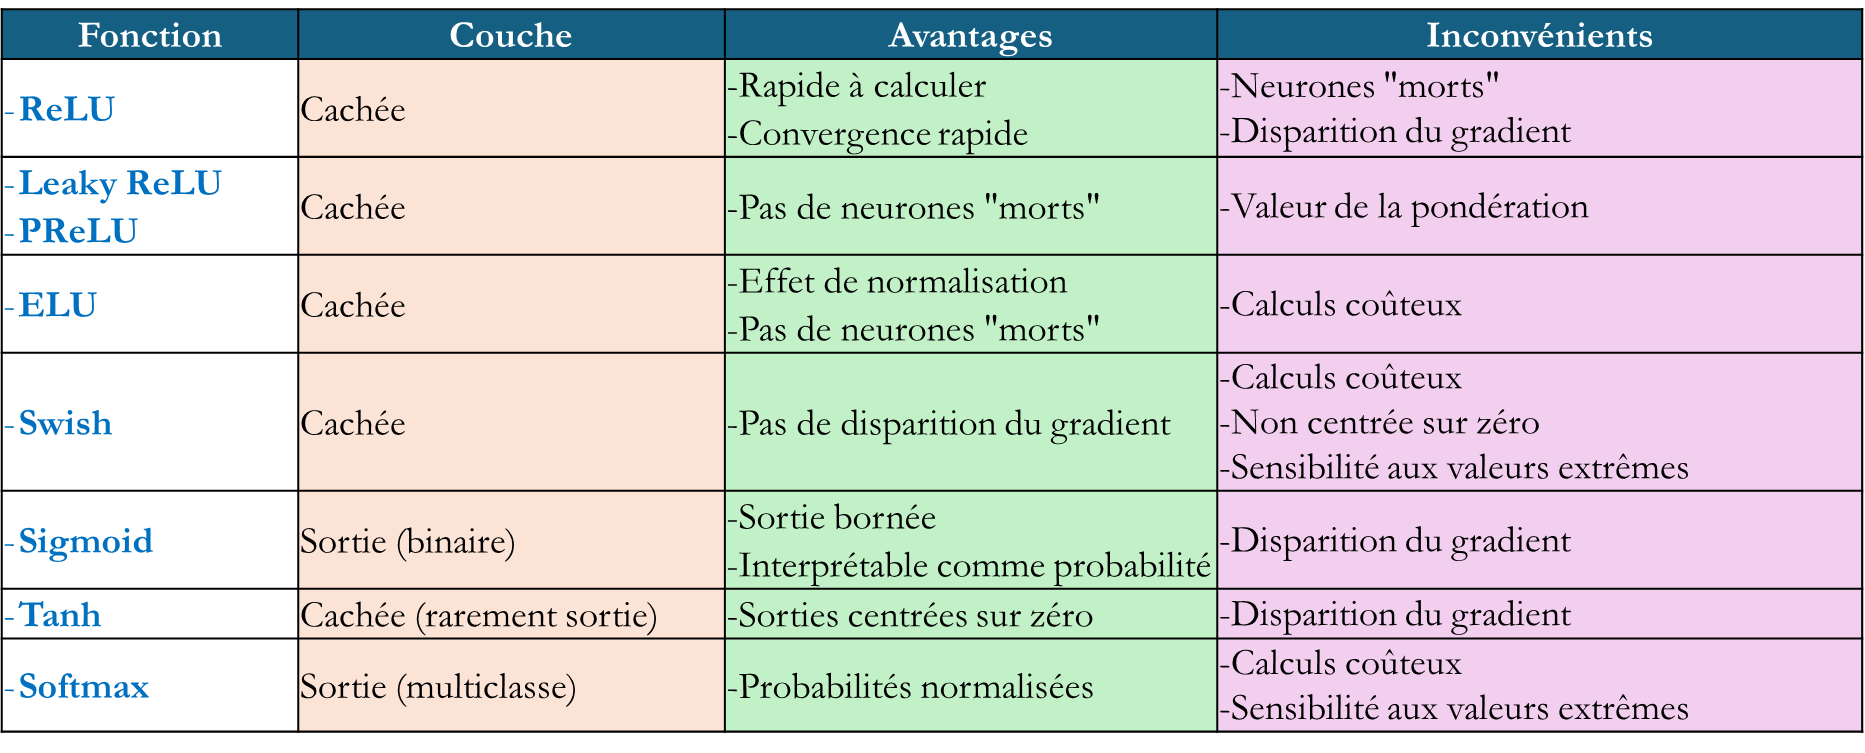

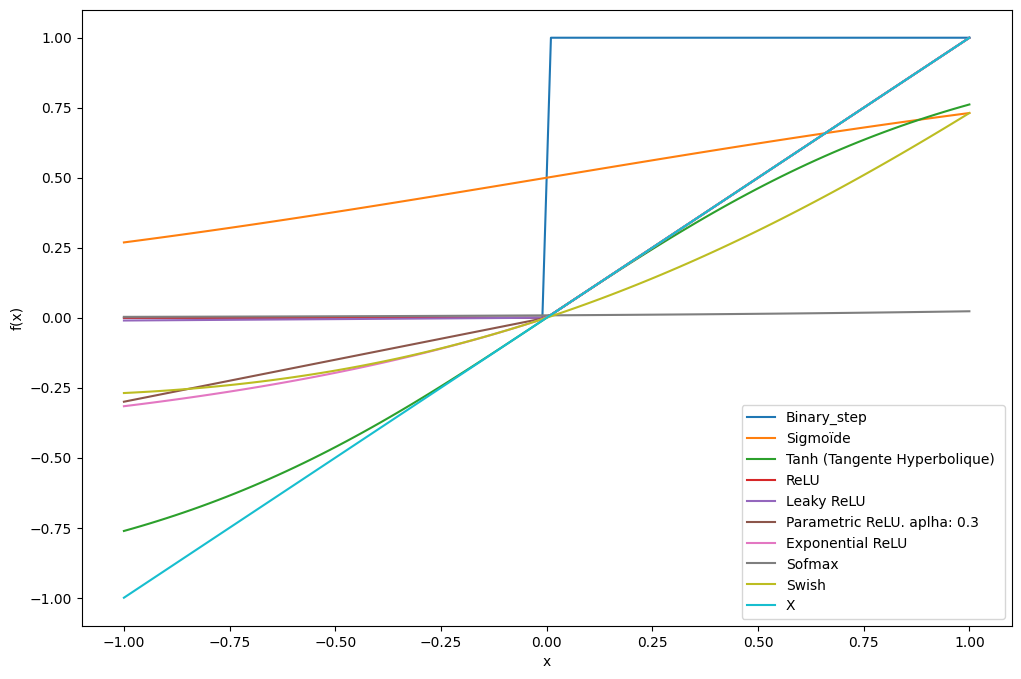

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des fonctions d'activation
def Binary_step(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def elu(x, alpha=0.5):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish (x):
    swi_x = x/(1+np.exp(-x))
    return swi_x

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


# Création de la plage de valeurs pour x
x = np.linspace(-1, 1, 100)

# Calcul des valeurs des fonctions d'activation
y_Binary_step= Binary_step(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)
y_prelu = leaky_relu(x, 0.3)
y_elu = elu(x)
y_softmax = softmax(x)
y_swish = swish(x)
# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(x, y_Binary_step, label="Binary_step")
plt.plot(x, y_sigmoid, label="Sigmoïde")
plt.plot(x, y_tanh, label="Tanh (Tangente Hyperbolique) ")
plt.plot(x, y_relu, label="ReLU")
plt.plot(x, y_leaky_relu, label="Leaky ReLU")
plt.plot(x, y_prelu, label="Parametric ReLU. aplha: 0.3")
plt.plot(x, y_elu, label="Exponential ReLU")
plt.plot(x, y_softmax, label="Sofmax")
plt.plot(x, y_swish, label="Swish")
plt.plot(x, x, label="X")

# Ajout de légendes et titre
#plt.title("Comparaison des Fonctions d'Activation en Deep Learning")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(False)
plt.show()

Pour mettre en valeur chacune des fonctions d’activation, nous allons mener une étude comparative entre elles
Nous allons implémenter un réseau neuronal simple pour la classification de l'ensemble de données Iris.

La base IRIS est une base de données très utilisées et qui est intégrée dans sickit learn  datasets et qui contient 150 enregistrements avec 4 caractéristiques (features) et avec 3 classes
Nous allons utiliser 80% pour l’entrainement et 20% pour la validation
Nous allons expérimenter différentes fonctions d'activation dans les couches cachées
Pour l'évaluation, nous allons mesurer les performances en termes de précision et de temps d'apprentissage.

Pour le modèle de classification, nous allons utiliser un Multilayer perceptron MLP avec :
- une couche d’entrée de 4 neurones pour 4 features
- une seule couche cachée de 10 neurones avec dans cet exemple la fonction d’activation ReLU
- et la couche de sortie avec 3 neurones pour 3 classes et bien sûr la fonction d’activation Softmax par ce que nous sommes dans un exemple de classification multiclasses

In [ ]:
# Charger et préparer les données
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from keras.layers import Dense
from keras.models import Sequential
model = Sequential(Dense(10, input_shape=(4,))) # Couche d'entrée (4 neurones)
model.add(Dense(10, activation='relu')) # 1 seule couche cachée (10 Neurone, activation ReLU)
model.add(Dense(3, activation='softmax')) # Couche de sortie (3 neurones, activation Softmax)

# Compiler le modéle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Lancer l'entrainement
model.fit(X_train, y_train, epochs=100, verbose=0)
# Evaluer le modéle
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")


Accuracy: 1.0000, Loss: 0.1148


<H1>Comparaison des fonctions d'activation dans un réseau neuronal</H1>
Nous allons implémenter un réseau neuronal simple pour une tâche de classification de l'ensemble de données Iris et nous allons expérimenter différentes fonctions d'activation à savoir: Sigmoid, Tanh, ReLU, Leaky ReLU, PReLU, ELU, et Swish. <br>
Pour l'évaluation, nous allons mesurer les performances en termes de précision et de temps d'apprentissage.



In [ ]:
import time
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger et préparer les données
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir une fonction pour créer un modèle avec différentes couches d'activations
def create_model(activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, input_shape=(4,)),
    ])

    if activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU())
    elif activation == 'prelu':
        model.add(tf.keras.layers.PReLU())
    else:
        model.add(tf.keras.layers.Dense(10, activation=activation))

    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Liste des fonction d'activation à tester
activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu', 'prelu', 'elu', 'swish']

# Entraînement et évaluation des modèles avec différentes fonctions d'activation
for activation in activations:
    start_time = time.time()
    model = create_model(activation)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    training_time = time.time() - start_time
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fonction d'activation: {activation}, Accuracy: {accuracy:.4f}, Loss: {loss:.4f}, Temps d'entrainement : {training_time:.2f} seconds")


Fonction d'activation: sigmoid, Accuracy: 0.9000, Loss: 0.3879, Temps d'entrainement : 3.33 seconds
Fonction d'activation: tanh, Accuracy: 0.9667, Loss: 0.1621, Temps d'entrainement : 1.66 seconds
Fonction d'activation: relu, Accuracy: 1.0000, Loss: 0.1303, Temps d'entrainement : 1.69 seconds
Fonction d'activation: leaky_relu, Accuracy: 0.9333, Loss: 0.3011, Temps d'entrainement : 1.45 seconds
Fonction d'activation: prelu, Accuracy: 0.9000, Loss: 0.3190, Temps d'entrainement : 2.01 seconds
Fonction d'activation: elu, Accuracy: 1.0000, Loss: 0.1009, Temps d'entrainement : 2.03 seconds
Fonction d'activation: swish, Accuracy: 1.0000, Loss: 0.0767, Temps d'entrainement : 2.44 seconds


In [ ]:
!pip install pydot graphviz

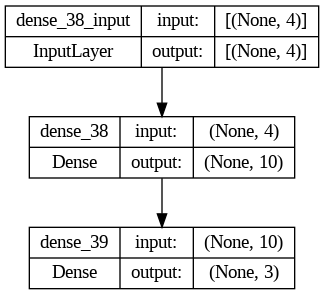

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Supposons que `model` est votre modèle Keras déjà construit
def create_model(activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation=activation, input_shape=(4,)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Créer un modèle pour l'exemple
model = create_model('relu')

# Générer et sauvegarder le diagramme du modèle
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)


Les résultats sont présentés sur le tableau ci-dessous. Nous avons entrainé et évalué notre modèle utilisant à chaque fois une fonction d’activation. Nous avons noté l’accuracy, la perte (le loss) et aussi le temps nécessaire à l’entrainement.

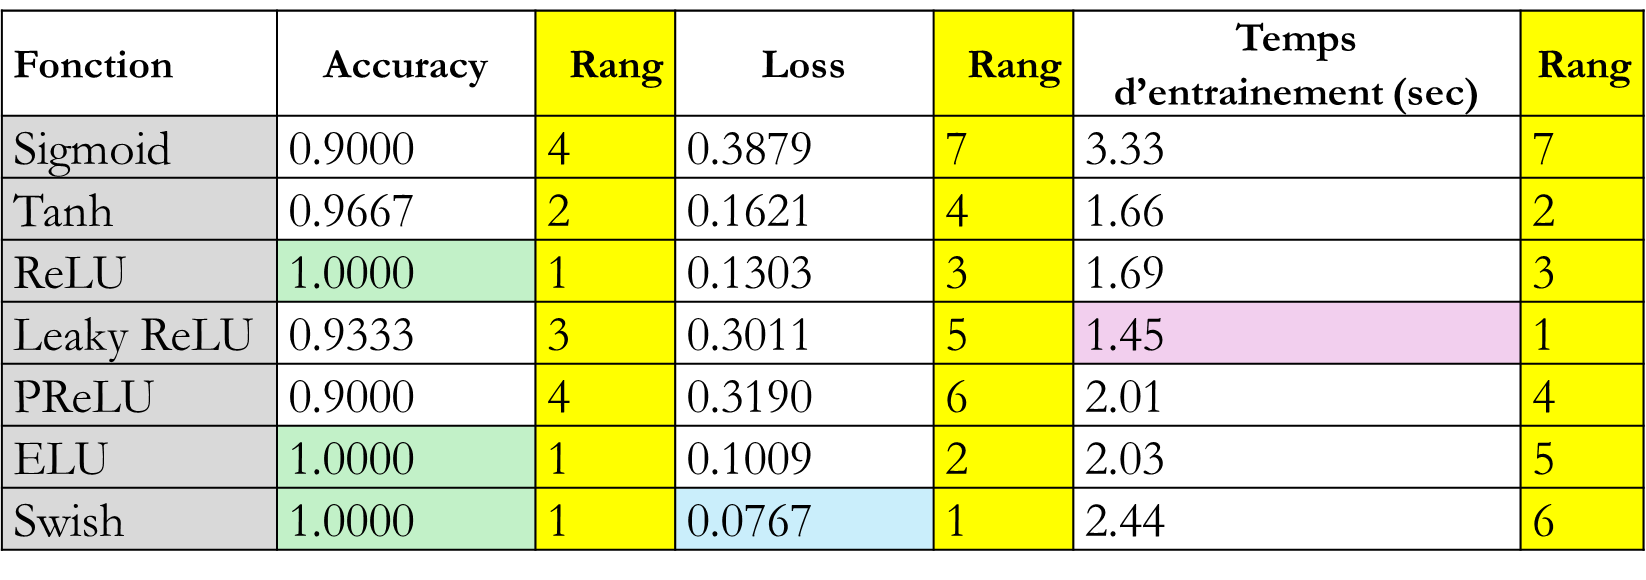

Comme attendu, la fonction RELU, ELU et swish sont les meilleures en terme d’accuracy. Mais en prenant en compte aussi le loss le swish reste la meilleure. Le problème est comme je l’ai déjà signalé est le temps d’entrainement en comparaison avec les autres fonctions d’activation. Ceci est dû à l’exponentiation et qui est utilisée aussi dans Sigmoid.
C’est pourquoi la RELU et ses variantes sont les plus utilisées

<H1>Exploration de la disparition et de l'éclatement du gradient</h1>
Nous allons voir maintenant un phénomène crucial dans l’élaboration d’un modèle d classification et surtout dans le choix de la fonction d’activation à utiliser. <br>
Ce problème est connu par le vanishing gradient ou la disparition du gradient.<br>
Le vanishing gradient est l’équivalent à la diminution de la magnitude du gradient dans la phase de la rétropropagation ou backpropagation dans le processus d’entrainement. <br>
La relation entre le vanishing gradient et les fonctions d'activation est cruciale, car la forme de la fonction d'activation et sa dérivée peuvent grandement influencer la magnitude des gradients. <br>
Par la suite nous allons étudier et voir comment certaines fonctions d'activation courantes interagissent avec ce problème.

L'exploration des phénomènes de disparition et d'explosion du gradient nécessite une configuration permettant de provoquer délibérément ces problèmes, puis d'en observer les effets. En règle générale, les réseaux neuronaux profonds comportant de nombreuses couches et utilisant certaines fonctions d'activation sont sujets à ces problèmes. Nous présentons ici un exemple Python utilisant TensorFlow/Keras pour démontrer ces deux problèmes.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

def create_deep_network(n_layers=10, activation='relu', initializer='glorot_uniform'):
    inputs = Input(shape=(10,))
    x = inputs
    for _ in range(n_layers):
        x = Dense(10, activation=activation, kernel_initializer=initializer)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

<H3>Expérimentation avec différents Initialisateurs et Fonctions d'Activation </H3>
Pour explorer la disparition du gradient, nous allons utiliser la fonction d'activation sigmoïde ou tanh avec un réseau profond (par exemple, nombre de couches cachées ègal à 10). <br>
Nous allons définir la fonction d'activation ainsi que sa dérivée et calculer la magnitude du gradient à mesure que nous remontons dans les couches du réseau (de la sortie vers l'entrée)

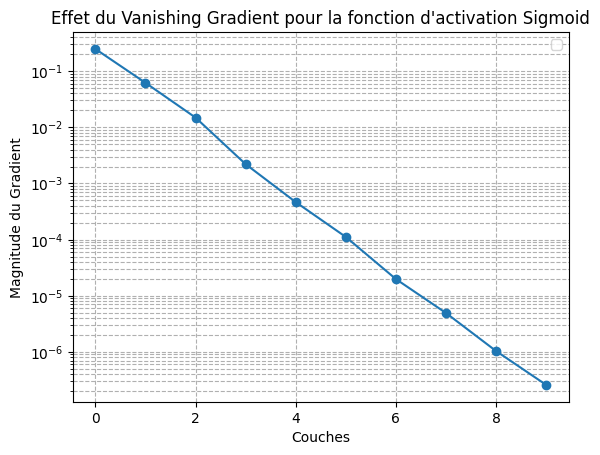

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Définition de la fonction d'activation sigmoïde et de sa dérivée
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
# Simulation de l'effet du vanishing gradient sur 10 couches
layers = 10
gradient_magnitude = np.zeros(layers)
initial_gradient = 1  # Gradient initial pour la sortie

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad = derivative_sigmoid(x)
    initial_gradient *= grad  # Mise à jour du gradient à travers les couches
    gradient_magnitude[i] = initial_gradient

# Affichage du graphique
plt.plot(gradient_magnitude, marker='o')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation Sigmoid')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.yscale('log')  # Échelle logarithmique
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


On remarque que la magnitude du gradient diminue exponentiellement à mesure que nous remontons dans les couches du réseau (de la sortie vers l'entrée). Cet effet est dû à l'utilisation d'une fonction d'activation comme la sigmoïde, dont la dérivée peut devenir très petite. Cela rend difficile la mise à jour des poids des premières couches pendant l'entraînement, car les gradients qui parviennent à ces couches sont presque nuls, ce qui ralentit considérablement l'apprentissage ou le rend impossible.

Pour mieux comprendre l'origine de cette atténuation, sur la figure ci-dessous sont représentées la fonction sigmoïde ainsi que sa dérivée. <br>
On peut voir l’atténuation de la dérivée en fonction de l’entrée.

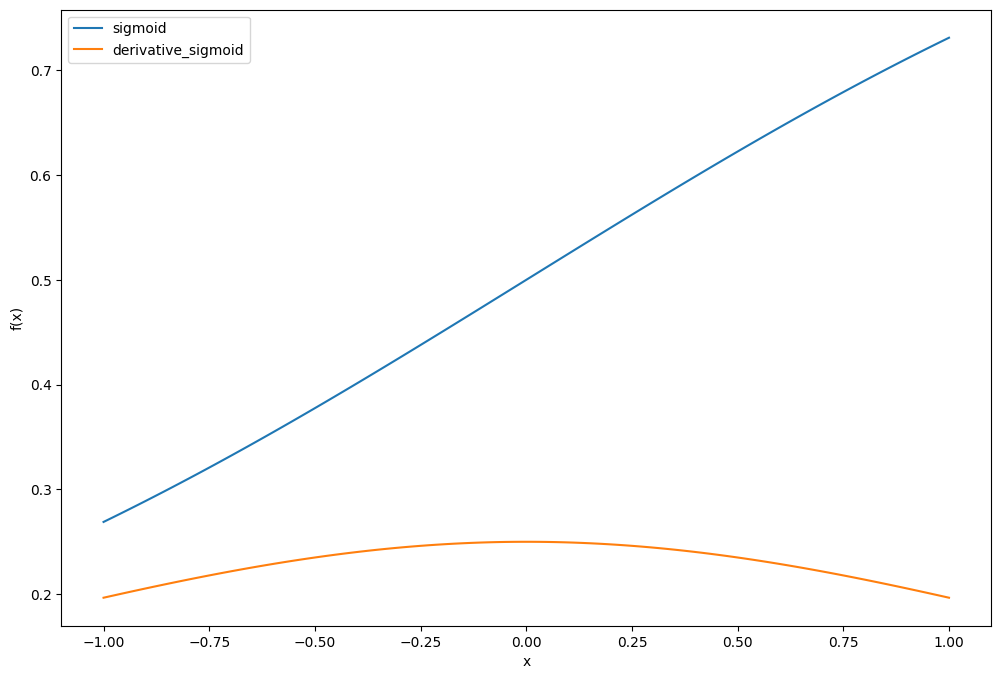

In [ ]:
# Création de la plage de valeurs pour x
x = np.linspace(-1, 1, 100)

# Calcul des valeurs des fonctions d'activation
y= sigmoid(x)
y_derivative = derivative_sigmoid(x)

# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(x, y, label="sigmoid")
plt.plot(x, y_derivative, label="derivative_sigmoid")


# Ajout de légendes et titre
#plt.title("Comparaison des Fonctions d'Activation en Deep Learning")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(False)
plt.show()

Pour le cas de la fonction Tanh.

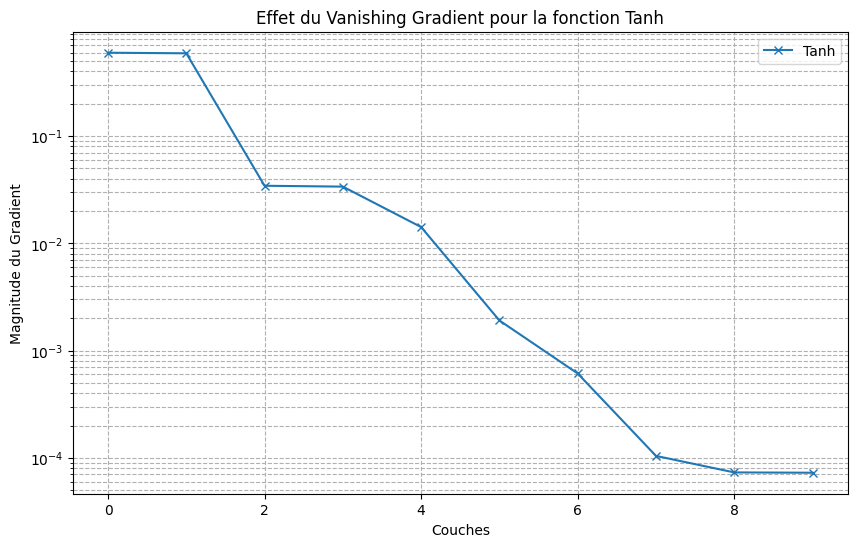

In [ ]:
# Définition de la fonction d'activation tanh et sa dérivée
def tanh(x):
    return np.tanh(x)
def derivative_tanh(x):
    return 1 - tanh(x)**2
# Simulation de l'effet du vanishing gradient pour tanh et ReLU
layers = 10
gradient_magnitude_tanh = np.zeros(layers)
initial_gradient_tanh = 1  # Gradient initial pour la sortie tanh

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_tanh = derivative_tanh(x)
    # Mise à jour du gradient à travers les couches pour tanh et ReLU
    initial_gradient_tanh *= grad_tanh
    gradient_magnitude_tanh[i] = initial_gradient_tanh

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.plot(gradient_magnitude_tanh, marker='x', label='Tanh')
plt.title('Effet du Vanishing Gradient pour la fonction Tanh')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.yscale('log')  # Échelle logarithmique
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

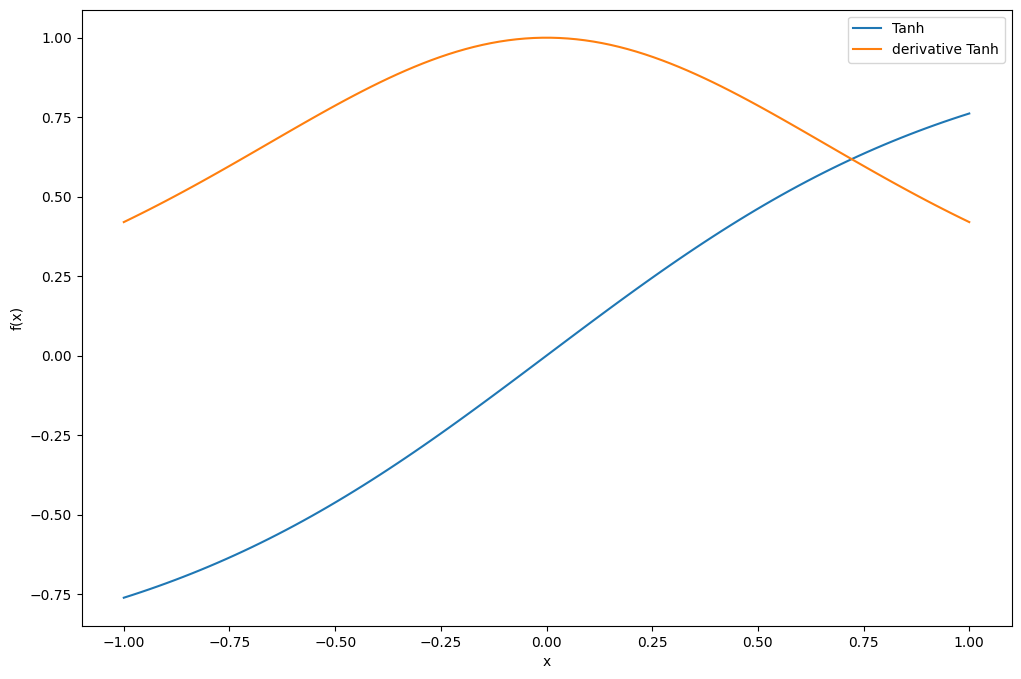

In [ ]:
# Création de la plage de valeurs pour x
x = np.linspace(-1, 1, 100)

# Calcul des valeurs des fonctions d'activation
y= tanh(x)
y_derivative = derivative_tanh(x)

# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(x, y, label="Tanh")
plt.plot(x, y_derivative, label="derivative Tanh")


# Ajout de légendes et titre
#plt.title("Comparaison des Fonctions d'Activation en Deep Learning")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(False)
plt.show()

Bien qu'elle présente également un vanishing gradient, la diminution est légèrement moins sévère que pour la sigmoïde. Cela est dû à la gamme de sortie de tanh (-1 à 1) qui est plus étendue que celle de la sigmoïde (0 à 1).

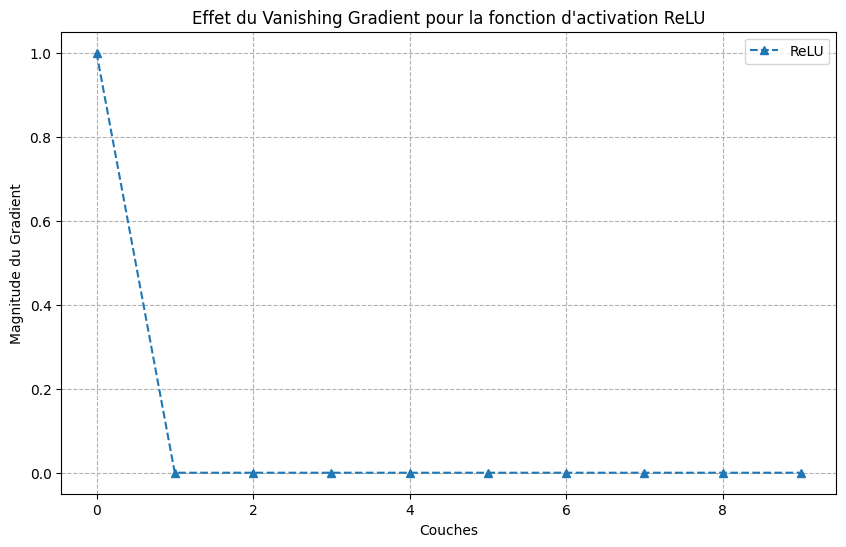

In [ ]:
# Définition de la fonction d'activation ReLU et sa dérivée
def relu(x):
    return np.maximum(0, x)
def derivative_relu(x):
    return np.where(x > 0, 1, 0)
# Simulation de l'effet du vanishing gradient pour ReLU
layers = 10
gradient_magnitude_relu = np.zeros(layers)
initial_gradient_relu = 1  # Gradient initial pour la sortie ReLU
for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_relu = derivative_relu(x)
    # Mise à jour du gradient à travers les couches pour ReLU
    initial_gradient_relu *= grad_relu
    gradient_magnitude_relu[i] = initial_gradient_relu

# Ajustement pour une meilleure visualisation, en particulier pour ReLU
# Nous allons utiliser une échelle linéaire au lieu d'une échelle logarithmique pour mieux voir la ReLU

plt.figure(figsize=(10, 6))
plt.plot(gradient_magnitude_relu, marker='^', label='ReLU', linestyle='--')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation ReLU')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()



La ReLU, en revanche, maintient une magnitude de gradient plus stable à travers les couches. Cela est dû à sa caractéristique où la dérivée dans la région positive est constante, ce qui aide à prévenir le vanishing gradient. Toutefois, il est important de se rappeler que la ReLU peut conduire à d'autres problèmes, tels que le problème des neurones morts, si elle est mal utilisée.

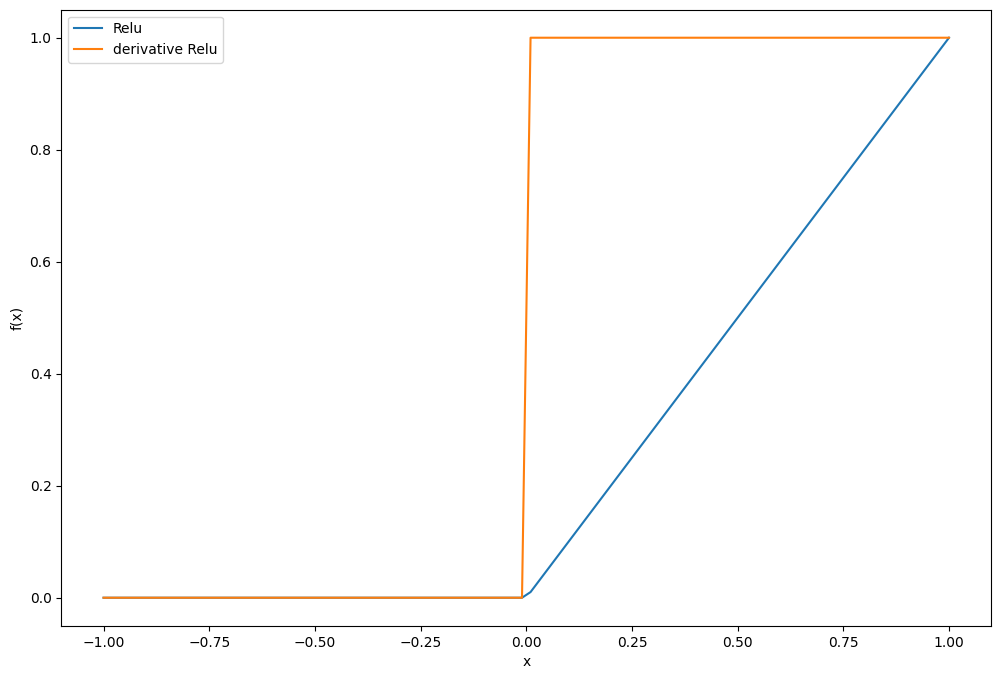

In [ ]:
# Création de la plage de valeurs pour x
x = np.linspace(-1, 1, 100)

# Calcul des valeurs des fonctions d'activation
y= relu(x)
y_derivative = derivative_relu(x)

# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(x, y, label="Relu")
plt.plot(x, y_derivative, label="derivative Relu")


# Ajout de légendes et titre
#plt.title("Comparaison des Fonctions d'Activation en Deep Learning")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(False)
plt.show()

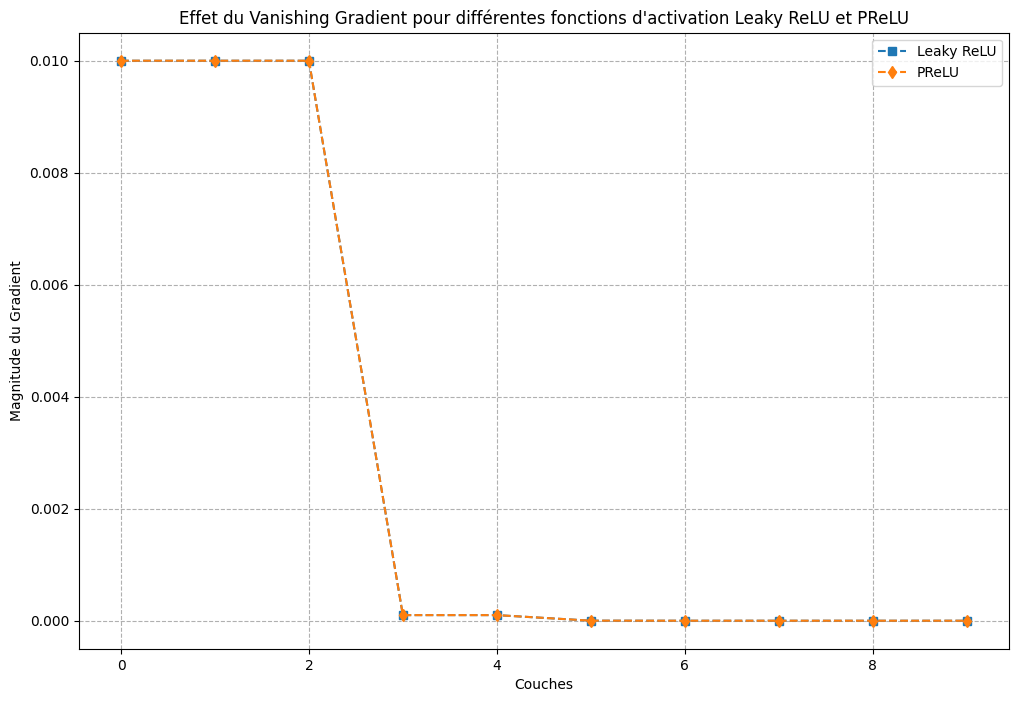

In [ ]:
# Définition des variantes de ReLU et leurs dérivées
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def prelu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_prelu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def derivative_elu(x, alpha=1):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

# Simulation de l'effet du vanishing gradient pour Leaky ReLU, PReLU, et ELU
gradient_magnitude_leaky_relu = np.zeros(layers)
gradient_magnitude_prelu = np.zeros(layers)
gradient_magnitude_elu = np.zeros(layers)
initial_gradient_leaky_relu = initial_gradient_prelu = initial_gradient_elu = 1  # Gradient initial

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_leaky_relu = derivative_leaky_relu(x)
    grad_prelu = derivative_prelu(x)
    grad_elu = derivative_elu(x)

    # Mise à jour du gradient à travers les couches pour chaque variante
    initial_gradient_leaky_relu *= grad_leaky_relu
    initial_gradient_prelu *= grad_prelu
    initial_gradient_elu *= grad_elu

    gradient_magnitude_leaky_relu[i] = initial_gradient_leaky_relu
    gradient_magnitude_prelu[i] = initial_gradient_prelu
    gradient_magnitude_elu[i] = initial_gradient_elu

# Affichage du graphique avec les variantes de ReLU
plt.figure(figsize=(12, 8))
# plt.plot(gradient_magnitude, marker='o', label='Sigmoïde', linestyle='--')
# plt.plot(gradient_magnitude_tanh, marker='x', label='Tanh', linestyle='--')
#plt.plot(gradient_magnitude_relu, marker='^', label='ReLU', linestyle='--')
plt.plot(gradient_magnitude_leaky_relu, marker='s', label='Leaky ReLU', linestyle='--')
plt.plot(gradient_magnitude_prelu, marker='d', label='PReLU', linestyle='--')
#plt.plot(gradient_magnitude_elu, marker='*', label='ELU', linestyle='--')
plt.title('Effet du Vanishing Gradient pour différentes fonctions d\'activation Leaky ReLU et PReLU')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

Leaky ReLU et PReLU ont été présentées pour atténuer le problème des neurones morts associé à ReLU standard. <br> Pour le vanishing gradient, les deux fonctions montrent des comportements similaires à ReLU, maintenant une magnitude de gradient plus stable à travers les couches, grâce à leur capacité à permettre un petit gradient pour les valeurs d'entrée négatives.

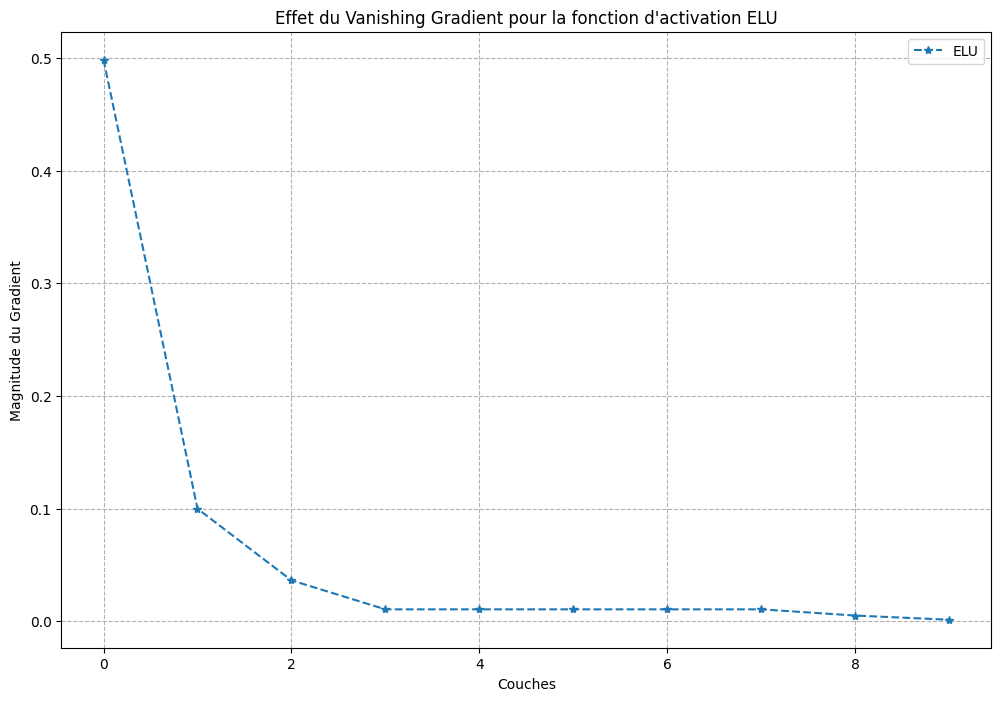

In [ ]:
# Définition des variantes de ReLU et leurs dérivées
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def prelu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_prelu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def derivative_elu(x, alpha=1):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

# Simulation de l'effet du vanishing gradient pour Leaky ReLU, PReLU, et ELU
gradient_magnitude_leaky_relu = np.zeros(layers)
gradient_magnitude_prelu = np.zeros(layers)
gradient_magnitude_elu = np.zeros(layers)
initial_gradient_leaky_relu = initial_gradient_prelu = initial_gradient_elu = 1  # Gradient initial

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_leaky_relu = derivative_leaky_relu(x)
    grad_prelu = derivative_prelu(x)
    grad_elu = derivative_elu(x)

    # Mise à jour du gradient à travers les couches pour chaque variante
    initial_gradient_leaky_relu *= grad_leaky_relu
    initial_gradient_prelu *= grad_prelu
    initial_gradient_elu *= grad_elu

    gradient_magnitude_leaky_relu[i] = initial_gradient_leaky_relu
    gradient_magnitude_prelu[i] = initial_gradient_prelu
    gradient_magnitude_elu[i] = initial_gradient_elu

# Affichage du graphique avec les variantes de ReLU
plt.figure(figsize=(12, 8))
# plt.plot(gradient_magnitude, marker='o', label='Sigmoïde', linestyle='--')
# plt.plot(gradient_magnitude_tanh, marker='x', label='Tanh', linestyle='--')
#plt.plot(gradient_magnitude_relu, marker='^', label='ReLU', linestyle='--')
#plt.plot(gradient_magnitude_leaky_relu, marker='s', label='Leaky ReLU', linestyle='--')
#plt.plot(gradient_magnitude_prelu, marker='d', label='PReLU', linestyle='--')
plt.plot(gradient_magnitude_elu, marker='*', label='ELU', linestyle='--')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation ELU')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

LA fonction d’activation ELU montre également une meilleure capacité à maintenir un gradient à travers les couches comparé aux fonctions sigmoïde et tanh, grâce à son approche unique pour les entrées négatives, qui aide non seulement à combattre le vanishing gradient mais également à améliorer la normalisation des activations.

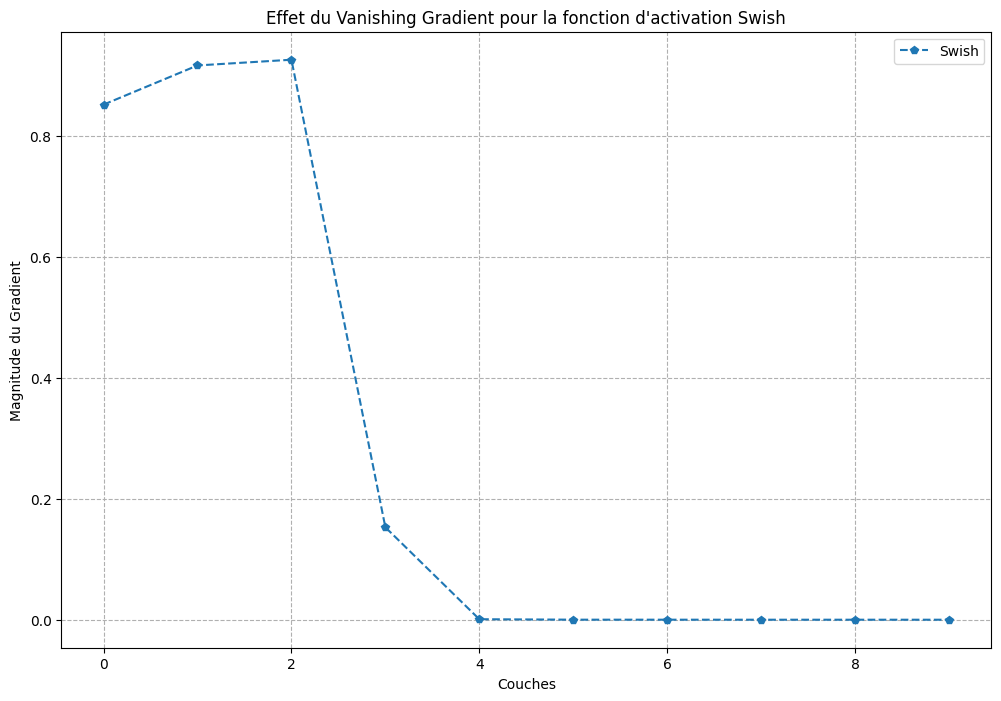

In [ ]:
# Définition de la fonction Swish et de sa dérivée
def swish(x, beta=1):
    return x * sigmoid(beta * x)

def derivative_swish(x, beta=1):
    return beta * swish(x, beta) + sigmoid(beta * x) * (1 - beta * swish(x, beta))

# Simulation de l'effet du vanishing gradient pour Swish
gradient_magnitude_swish = np.zeros(layers)
initial_gradient_swish = 1  # Gradient initial pour Swish

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_swish = derivative_swish(x)
    initial_gradient_swish *= grad_swish
    gradient_magnitude_swish[i] = initial_gradient_swish

# Affichage du graphique avec Swish ajoutée
plt.figure(figsize=(12, 8))
plt.plot(gradient_magnitude_swish, marker='p', label='Swish', linestyle='--')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation Swish')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

La fonction d’activtation Swish combine les avantages de la fonction sigmoïde avec la capacité de laisser passer les gradients négatifs. Ce qui permet de maintenir un flux de gradient efficace à travers de nombreuses couches, et en réduisant les problèmes de vanishing ou exploding gradients.

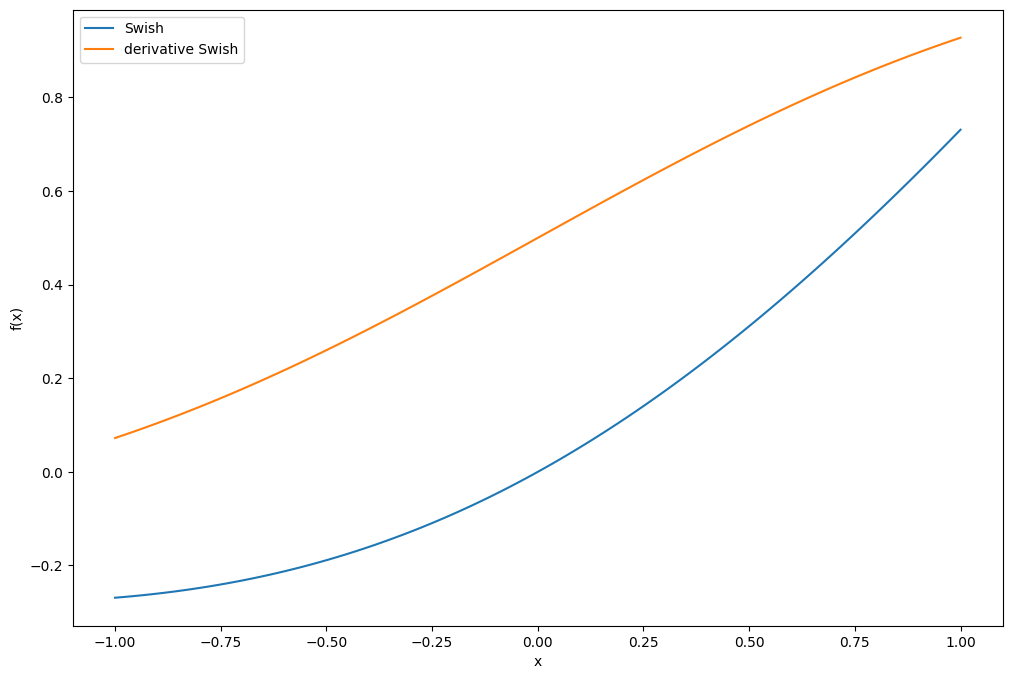

In [ ]:
# Création de la plage de valeurs pour x
x = np.linspace(-1, 1, 100)

# Calcul des valeurs des fonctions d'activation
y= swish(x)
y_derivative = derivative_swish(x)

# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(x, y, label="Swish")
plt.plot(x, y_derivative, label="derivative Swish")


# Ajout de légendes et titre
#plt.title("Comparaison des Fonctions d'Activation en Deep Learning")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(False)
plt.show()

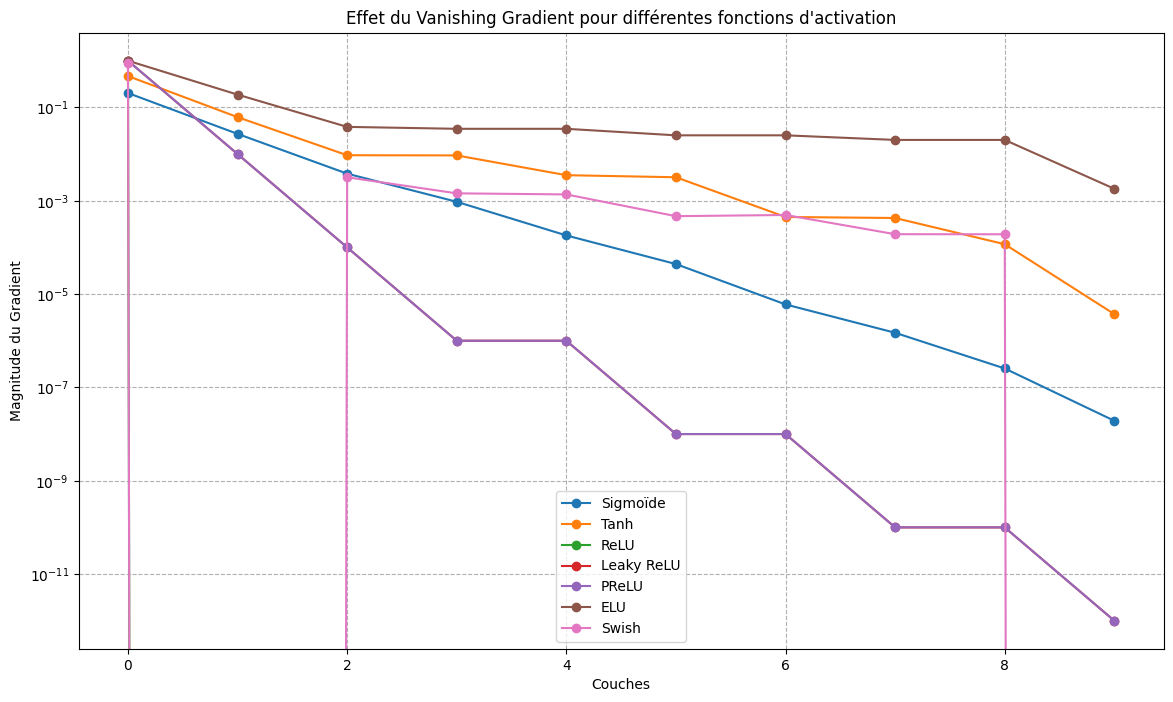

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction d'activation sigmoïde et sa dérivée
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Tanh et sa dérivée
def tanh(x):
    return np.tanh(x)

def derivative_tanh(x):
    return 1 - np.tanh(x)**2

# ReLU et sa dérivée
def relu(x):
    return np.maximum(0, x)

def derivative_relu(x):
    return np.where(x > 0, 1, 0)

# Leaky ReLU et sa dérivée
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# PReLU et sa dérivée
def prelu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_prelu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# ELU et sa dérivée
def elu(x, alpha=1):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def derivative_elu(x, alpha=1):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

# Swish et sa dérivée
def swish(x, beta=1):
    return x * sigmoid(beta * x)

def derivative_swish(x, beta=1):
    return beta * swish(x, beta) + sigmoid(beta * x) * (1 - beta * swish(x, beta))

# Simulation de l'effet du vanishing gradient pour chaque fonction d'activation
layers = 10
activations = ['Sigmoïde', 'Tanh', 'ReLU', 'Leaky ReLU', 'PReLU', 'ELU', 'Swish']
gradient_magnitudes = np.zeros((len(activations), layers))

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    gradients = [
        derivative_sigmoid(x),
        derivative_tanh(x),
        derivative_relu(x),
        derivative_leaky_relu(x),
        derivative_prelu(x),
        derivative_elu(x),
        derivative_swish(x)
    ]

    # Mise à jour du gradient à travers les couches pour chaque fonction
    if i == 0:
        gradient_magnitudes[:, i] = gradients
    else:
        gradient_magnitudes[:, i] = gradient_magnitudes[:, i-1] * gradients

# Affichage du graphique
plt.figure(figsize=(14, 8))
for i, activation in enumerate(activations):
    plt.plot(gradient_magnitudes[i], marker='o', label=activation)

plt.title('Effet du Vanishing Gradient pour différentes fonctions d\'activation')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.yscale('log')  # Échelle logarithmique pour mieux visualiser les changements
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


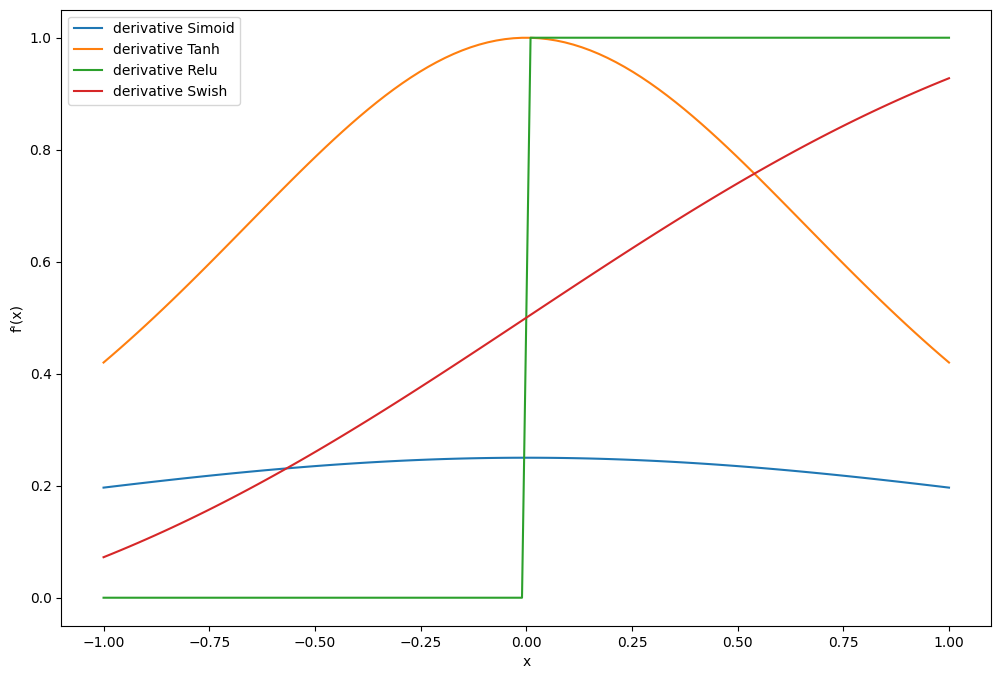

In [ ]:
# Création de la plage de valeurs pour x
x = np.linspace(-1, 1, 100)

# Calcul des valeurs des fonctions d'activation
y_derivative_sigmoid= derivative_sigmoid(x)
y_derivative_tanh= derivative_tanh(x)
y_derivative_relu= derivative_relu(x)
y_derivative_swish = derivative_swish(x)


# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(x, y_derivative_sigmoid, label="derivative Simoid")
plt.plot(x, y_derivative_tanh, label="derivative Tanh")
plt.plot(x, y_derivative_relu, label="derivative Relu")
plt.plot(x, y_derivative_swish, label="derivative Swish")


# Ajout de légendes et titre
#plt.title("Comparaison des Fonctions d'Activation en Deep Learning")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(False)
plt.show()

<h1>Conclusion </h1>
Cet atelier a détaillé les différentes fonctions d’activation couramment utilisées dans les réseaux de neurones artificiels, notamment la fonction ReLU et ses variantes (Leaky ReLU, PReLU, ELU, Swish), ainsi que les fonctions Tanh, Sigmoïde et Softmax. Pour chaque fonction, nous avons examiné les avantages et les inconvénients, ainsi que les contextes d’utilisation appropriés. Nous avons également exploré l’impact de ces fonctions sur le problème de la disparition du gradient, connu sous le nom de 'vanishing gradients'. Cette analyse approfondie vise à fournir une compréhension claire de comment et pourquoi sélectionner une fonction d’activation spécifique en fonction des besoins du modèle et de la nature du problème à résoudre.

